In [35]:
import numpy as np
import pandas as pd
import pickle
import cv2
from PIL import Image
import pytesseract
import re

In [4]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu


Bad key "text.kerning_factor" on line 4 in
/Users/valeritereshchenko/opt/anaconda3/envs/ValeriaAllWomen/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


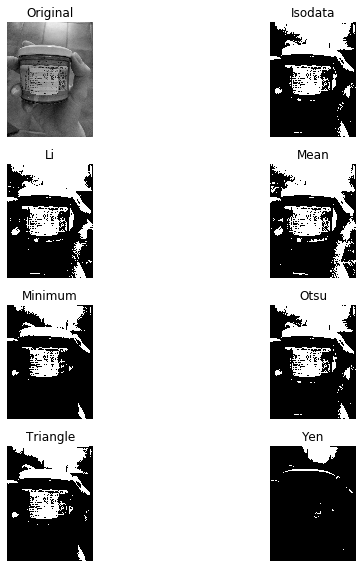

In [4]:
from skimage.filters import try_all_threshold
from skimage.io import imread, imshow, imsave

img = imread('/Users/valeritereshchenko/Desktop/Final Project/off-nutrition-table-extractor-master/test_images/IMG_20200625_131542.jpg', as_gray=True)

# Here, we specify a radius for local thresholding algorithms.
# If it is not specified, only global algorithms are called.
fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [5]:
img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# Apply dilation and erosion to remove some noise
kernel = np.ones((1, 1), np.uint8)
img = cv2.dilate(img, kernel, iterations=1)
img = cv2.erode(img, kernel, iterations=1)



In [6]:

# Apply blur to smooth out the edges
img = cv2.GaussianBlur(img, (5, 5), 0)

In [9]:

imsave('./image.jpg', img) 

Lossy conversion from float64 to uint8. Range [-0.0012163261430871255, 0.9913276062951837]. Convert image to uint8 prior to saving to suppress this warning.


In [10]:
from tesserocr import PyTessBaseAPI
with PyTessBaseAPI(path='/Users/valeritereshchenko/Desktop/Final Project/tessdata-master', lang='spa+eng') as api:
    api.SetImageFile('/Users/valeritereshchenko/Desktop/Final Project/image.jpg')
    print(api.GetUTF8Text())
    print(api.AllWordConfidences()) #list of integers ranging from 0(worst)to 100(best) 
                                                #,each score represent one word

a o

1 Porcion
1009 Porgdo (16,9
Valor energético / 289K 453K

| kcal — 109 kcal
Grasas / Lípidos 3q
- de las cuales saturadas /

 

[28, 20, 68, 91, 47, 57, 20, 93, 92, 95, 72, 77, 85, 90, 67, 81, 80, 81, 90, 91, 63, 92, 92, 93, 92, 92, 96, 95]


In [5]:
file = r'/Users/valeritereshchenko/Desktop/Final Project/image.jpg'
table_image_contour = cv2.imread(file, 0)
table_image = cv2.imread(file)

In [6]:
ret, thresh_value = cv2.threshold(
    table_image_contour, 180, 255, cv2.THRESH_BINARY_INV)

In [7]:
kernel = np.ones((5,5),np.uint8)
dilated_value = cv2.dilate(thresh_value,kernel,iterations = 1)


In [8]:
contours, hierarchy = cv2.findContours(
    dilated_value, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [9]:
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    # bounding the images
    if y < 300:
        table_image = cv2.rectangle(table_image, (x, y), (x + w, y + h), (0, 0, 255), 1)


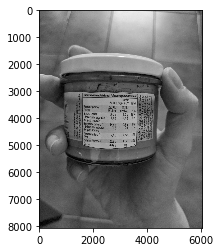

In [10]:
plt.imshow(table_image)
plt.show()
cv2.namedWindow('detecttable', cv2.WINDOW_NORMAL)

### Table Detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/valeritereshchenko/opt/anaconda3/envs/ValeriaAllWomen/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
file = r'/Users/valeritereshchenko/Desktop/Final Project/off-nutrition-table-extractor-master/test_images/IMG_20200625_131542.jpg'

im1 = cv2.imread(file, 0)
im = cv2.imread(file)

In [3]:
ret,thresh_value = cv2.threshold(im1,180,255,cv2.THRESH_BINARY_INV)

In [4]:
kernel = np.ones((5,5),np.uint8)
dilated_value = cv2.dilate(thresh_value,kernel,iterations = 1)

In [5]:
_contours, hierarchy = cv2.findContours(dilated_value,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [6]:
cordinates = []
for cnt in _contours:
 x,y,w,h = cv2.boundingRect(cnt)
 cordinates.append((x,y,w,h))
 #bounding the images
 if y< 50:
        cv2.rectangle(im,(x,y),(x+w,y+h),(0,0,255),1)

True

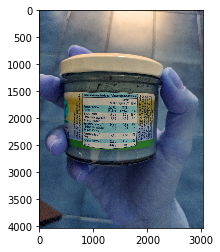

In [7]:
plt.imshow(im)
cv2.imwrite('detecttable.jpg',im)


Bad key "text.kerning_factor" on line 4 in
/Users/valeritereshchenko/opt/anaconda3/envs/ValeriaAllWomen/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


True

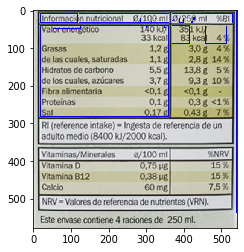

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

file =  r'/Users/valeritereshchenko/Desktop/Final Project/images/lechec de coco .png'

im1 = cv2.imread(file, 0)
im = cv2.imread(file)

ret,thresh_value = cv2.threshold(im1,180,255,cv2.THRESH_BINARY_INV)

kernel = np.ones((5,5),np.uint8)
dilated_value = cv2.dilate(thresh_value,kernel,iterations = 1)

_contours, hierarchy = cv2.findContours(dilated_value,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cordinates = []
for cnt in _contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cordinates.append((x,y,w,h))
    #bounding the images
    if y< 50:
        
        cv2.rectangle(im,(x,y),(x+w,y+h),(0,0,255),1)
        
plt.imshow(im)
cv2.namedWindow('detecttable', cv2.WINDOW_NORMAL)
cv2.imwrite('detecttable.jpg',im)

In [12]:
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
im = cv2.imread('/Users/valeritereshchenko/Desktop/Final Project/off-nutrition-table-extractor-master/test_images/IMG_20200625_131542.jpg')

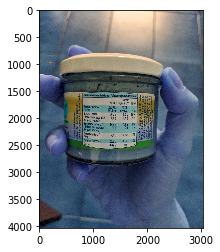

In [13]:
bbox, label, conf = cv.detect_common_objects(im)
output_image = draw_bbox(im, bbox, label, conf)
plt.imshow(output_image)
plt.show()

import requests

url = 'https://app.nanonets.com/api/v2/OCR/Model/77ac8fa2-3496-4847-a002-794f42dfc4d1/LabelUrls/'

headers = {
    'accept': 'application/x-www-form-urlencoded'
}

data = {'urls' : ['https://goo.gl/ICoiHc']}

response = requests.request('POST', url, headers=headers, auth=requests.auth.HTTPBasicAuth('lF9GYh6RqnBP7P535kD2btjVSsf8-gAQ', ''), data=data)

print(response.text)

In [9]:
#For multiple images 

from tesserocr import PyTessBaseAPI
images = ['/Users/valeritereshchenko/Desktop/Final Project/images/yogur5.jpg', '/Users/valeritereshchenko/Desktop/Final Project/images/vegetal.jpg']
with PyTessBaseAPI(path='/Users/valeritereshchenko/Desktop/Final Project/tessdata-master', lang='spa') as api:
    for img in images:
        api.SetImageFile(img)
        print(api.GetUTF8Text())

  

.g INFORMACIÓN NUTRICIONAL POR + PORUNIDAD -
s| INFORMAZIÓNI NUTRIZIONALI — -- PER f AQ PER UN
E 0 NUTRICIONAL 1006 0R UNIDADE (75 0)- *400” POR UNIDADE
E E%mmagu¡g£m¡m…/ ea — O
-1 GRASS 7 GRO / LIOS () 0 — 0
OECAS CULES STURADS/ OLCUI -- jpo
SATUNL / DOS QUAIS SATURADOS 16) — **
| IDRATOS DE CARBONO / CARBOLORATE / 1El u
' 11 BATOS DE CARBONO (6) E
N DELOS CUALES ATUCARES/ OEGUE - 1560
2U0cHER / D0S QUAIS ACUCARES () -- 210
PROTEIMAS/FRUTEINE/PRUTEINAS (m 29 2
SAL /SALE 7 SAL(G) ae 00 007

“ADA — DOSÉ CIORNALIERA RACCOMANDATA PER UN ADULTO
"DR — DOSE DE REFERENCIA PARA UN ADULTO M

| “1 — INGESTA DE REFERENCIA PARA UN ABULTO M%Dll] mqu 11/2000 xc¿u
| Emo (8400 172000 XCAD.

   

AE nc

 

JA POR UNIDAD




In [21]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="forward-theorem-267410-1d39ec19a7d0.json"

In [26]:
from google.cloud import vision


def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])

        print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
        
    return response 

In [28]:
a = detect_text('/Users/valeritereshchenko/Desktop/Final Project/images/yogur5.jpg')

Texts:

"a es sabia!
INFORMACIÓN NUTRICIONAL
INFORMAZIONI NUTRIZIONALI
DECLARAÇÃO NUTRICIONAL
VALOR ENERGÉTICO / VALORE ENERGETICO/
ENERGIA (KJ) /(KCAL)
GRASAS / GRASSI / LÍPIDOS (G)
DE LAS CUALES SATURADAS / DI CUI
SATURI/DOS QUAIS SATURADOS (G)
HIDRATOS DE CARBONO / CARBOIDRATI /
HIDRATOS DE CARBONO (G)
DE -LOS CUALES AZÚCARES / DI CUI
ZUCCHERI / DOS QUAIS AÇÚCARES (G)
PROTEÍNAS / PROTEINE / PROTEÍNAS (G)
SAL /SALE / SAL (G)
POR UNIDAD %IR" POR UNIDAD
PER UNITÀ
100 G POR UNIDADE (75 G) %DR" POR UNIDADE
POR
PER
% DI RDA" PER UNITA
1382/332
1041/250
13
24,0
18.0
26
16.0
12,0
60
25,0
21.0
15.8
18
4
2.9
0,03
22
0.02
IR-INGESTA DE REFERENCIA PARA UN ADULTO MEDIO (8400 KJ/2000 KCAL).
RDA - DOSE GIORNALIERA RACCOMANDATA PER UN ADULTO DI MEDIA COSTITUZIONE (8400 KJ/2000 KCALD.
"DR- DOSE DE REFERENCIA PARA UM ADULTO MEDIO (8400 KJ/2000 KCAL).
225 6e 05 6 X3)
8.
"
bounds: (54,0),(1093,0),(1093,1140),(54,1140)

"a"
bounds: (82,16),(151,13),(157,140),(88,143)

"es"
bounds: (121,50),(232,45),(235

In [30]:
type(a)

google.cloud.vision_v1.types.AnnotateImageResponse

In [32]:
def detect_labels(path):
    """Detects labels in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    response = client.label_detection(image=image)
    labels = response.label_annotations
    print('Labels:')

    for label in labels:
        print(label.description)

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [33]:
detect_labels('/Users/valeritereshchenko/Desktop/Final Project/images/yogur5.jpg')

Labels:
Text
Font


In [47]:
#locale tells you the text language 

In [71]:
def detectText(img):
    with io.open(img,'rb') as image_file:
        content = image_file.read()

    image=vision.types.Image(content=content)
    reponse = client.text_detection(image=image) # returns TextAnnotation
    texts = response.text_annotations
    
    # annotate Image Response
    df = pd.DataFrame(columns=['locale', 'description'])
    for text in texts:
        df = df.append(
            dict(
                locale=text.locale,
                description=text.description
            ),
            ignore_index=True
    )

    return df 

print(df['description'][0])

a es sabia!
INFORMACIÓN NUTRICIONAL
INFORMAZIONI NUTRIZIONALI
DECLARAÇÃO NUTRICIONAL
VALOR ENERGÉTICO / VALORE ENERGETICO/
ENERGIA (KJ) /(KCAL)
GRASAS / GRASSI / LÍPIDOS (G)
DE LAS CUALES SATURADAS / DI CUI
SATURI/DOS QUAIS SATURADOS (G)
HIDRATOS DE CARBONO / CARBOIDRATI /
HIDRATOS DE CARBONO (G)
DE -LOS CUALES AZÚCARES / DI CUI
ZUCCHERI / DOS QUAIS AÇÚCARES (G)
PROTEÍNAS / PROTEINE / PROTEÍNAS (G)
SAL /SALE / SAL (G)
POR UNIDAD %IR" POR UNIDAD
PER UNITÀ
100 G POR UNIDADE (75 G) %DR" POR UNIDADE
POR
PER
% DI RDA" PER UNITA
1382/332
1041/250
13
24,0
18.0
26
16.0
12,0
60
25,0
21.0
15.8
18
4
2.9
0,03
22
0.02
IR-INGESTA DE REFERENCIA PARA UN ADULTO MEDIO (8400 KJ/2000 KCAL).
RDA - DOSE GIORNALIERA RACCOMANDATA PER UN ADULTO DI MEDIA COSTITUZIONE (8400 KJ/2000 KCALD.
"DR- DOSE DE REFERENCIA PARA UM ADULTO MEDIO (8400 KJ/2000 KCAL).
225 6e 05 6 X3)
8.



In [72]:
FILE_NAME = 'nuggets.jpg'
FOLDER_PATH = '/Users/valeritereshchenko/Desktop/Final Project/images'


print(detectText(os.path.join(FOLDER_PATH,FILE_NAME)))

    locale                                        description
0       it  a es sabia!\nINFORMACIÓN NUTRICIONAL\nINFORMAZ...
1                                                           a
2                                                          es
3                                                      sabia!
4                                                 INFORMACIÓN
..     ...                                                ...
146                                                        6e
147                                                        05
148                                                         6
149                                                       X3)
150                                                        8.

[151 rows x 2 columns]


In [52]:
df

,locale,description
0,it,a es sabia!\nINFORMACIÓN NUTRICIONAL\nINFORMAZ...
1,,a
2,,es
3,,sabia!
4,,INFORMACIÓN
...,...,...
146,,6e
147,,05
148,,6
149,,X3)


In [63]:
byte = text.HasField
print(byte)

<built-in method HasField of EntityAnnotation object at 0x7fc961163d00>


In [46]:
response.text_annotations

[locale: "it"
description: "a es sabia!\nINFORMACI\303\223N NUTRICIONAL\nINFORMAZIONI NUTRIZIONALI\nDECLARA\303\207\303\203O NUTRICIONAL\nVALOR ENERG\303\211TICO / VALORE ENERGETICO/\nENERGIA (KJ) /(KCAL)\nGRASAS / GRASSI / L\303\215PIDOS (G)\nDE LAS CUALES SATURADAS / DI CUI\nSATURI/DOS QUAIS SATURADOS (G)\nHIDRATOS DE CARBONO / CARBOIDRATI /\nHIDRATOS DE CARBONO (G)\nDE -LOS CUALES AZ\303\232CARES / DI CUI\nZUCCHERI / DOS QUAIS A\303\207\303\232CARES (G)\nPROTE\303\215NAS / PROTEINE / PROTE\303\215NAS (G)\nSAL /SALE / SAL (G)\nPOR UNIDAD %IR\" POR UNIDAD\nPER UNIT\303\200\n100 G POR UNIDADE (75 G) %DR\" POR UNIDADE\nPOR\nPER\n% DI RDA\" PER UNITA\n1382/332\n1041/250\n13\n24,0\n18.0\n26\n16.0\n12,0\n60\n25,0\n21.0\n15.8\n18\n4\n2.9\n0,03\n22\n0.02\nIR-INGESTA DE REFERENCIA PARA UN ADULTO MEDIO (8400 KJ/2000 KCAL).\nRDA - DOSE GIORNALIERA RACCOMANDATA PER UN ADULTO DI MEDIA COSTITUZIONE (8400 KJ/2000 KCALD.\n\"DR- DOSE DE REFERENCIA PARA UM ADULTO MEDIO (8400 KJ/2000 KCAL).\n225 6e 05 

In [39]:
# The first row gives you the whole text 
df.description[0]

'a es sabia!\nINFORMACIÓN NUTRICIONAL\nINFORMAZIONI NUTRIZIONALI\nDECLARAÇÃO NUTRICIONAL\nVALOR ENERGÉTICO / VALORE ENERGETICO/\nENERGIA (KJ) /(KCAL)\nGRASAS / GRASSI / LÍPIDOS (G)\nDE LAS CUALES SATURADAS / DI CUI\nSATURI/DOS QUAIS SATURADOS (G)\nHIDRATOS DE CARBONO / CARBOIDRATI /\nHIDRATOS DE CARBONO (G)\nDE -LOS CUALES AZÚCARES / DI CUI\nZUCCHERI / DOS QUAIS AÇÚCARES (G)\nPROTEÍNAS / PROTEINE / PROTEÍNAS (G)\nSAL /SALE / SAL (G)\nPOR UNIDAD %IR" POR UNIDAD\nPER UNITÀ\n100 G POR UNIDADE (75 G) %DR" POR UNIDADE\nPOR\nPER\n% DI RDA" PER UNITA\n1382/332\n1041/250\n13\n24,0\n18.0\n26\n16.0\n12,0\n60\n25,0\n21.0\n15.8\n18\n4\n2.9\n0,03\n22\n0.02\nIR-INGESTA DE REFERENCIA PARA UN ADULTO MEDIO (8400 KJ/2000 KCAL).\nRDA - DOSE GIORNALIERA RACCOMANDATA PER UN ADULTO DI MEDIA COSTITUZIONE (8400 KJ/2000 KCALD.\n"DR- DOSE DE REFERENCIA PARA UM ADULTO MEDIO (8400 KJ/2000 KCAL).\n225 6e 05 6 X3)\n8.\n'

In [37]:
import io
from PIL import Image, ImageDraw, ImageFont

def drawVertices(image_source, vertices, display_text=''):
    pillow_img = Image.open(io.BytesIO(image_source))

    draw = ImageDraw.Draw(pillow_img)
    for i in range(len(vertices) - 1):
        draw.line(((vertices[i].x, vertices[i].y), (vertices[i + 1].x, vertices[i + 1].y)),
                fill='green',
                width=8
        )

    draw.line(((vertices[len(vertices) - 1].x, vertices[len(vertices) - 1].y),
               (vertices[0].x, vertices[0].y)),
               fill='green',
               width=8
    )

    font = ImageFont.truetype('arial.ttf', 16)
    draw.text((vertices[0].x + 10, vertices[0].y),
              font=font, text=display_text, 
              fill=(255, 255, 255))
    pillow_img.show()